In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import reshape_data, get_dataset, get_dataloader, SeismicDataset
import torch
from torchvision import transforms

In [ ]:
get_dataset()

In [ ]:
data_path = 'data/dataset.npy'
number_degradations = 6 # total 12
reshape_data(data_path, number_degradations)

In [ ]:
dataset = np.load(f'data/dataset_reshaped.npy', allow_pickle=True)
print(dataset.shape); print(len(dataset))

In [ ]:
idx = 12
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(dataset[idx][0], cmap='seismic')
ax[1].imshow(dataset[idx][1], cmap='seismic')
plt.show()


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((128, 128)),])
dataset = SeismicDataset(data_path='data/dataset_reshaped.npy', transform=transform)

In [ ]:
print(dataset.__len__())
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(dataset[112][0].squeeze(), cmap='seismic')
ax[1].imshow(dataset[112][1].squeeze(), cmap='seismic')

In [2]:
trainloader, valoader, testloader = get_dataloader(batch_size=32, num_workers=1, data_path='data/dataset_reshaped.npy', im_size=(256,256))

In [3]:
len(trainloader), len(valoader), len(testloader)

(150, 19, 19)

In [4]:
img, degr = next(iter(trainloader))

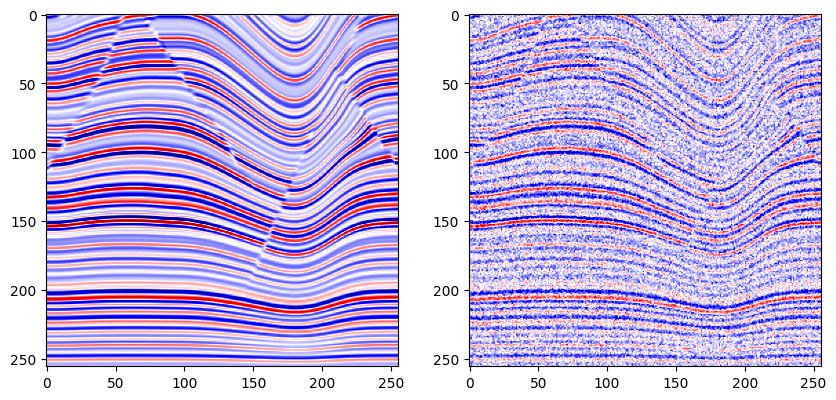

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img[-1].squeeze(), cmap='seismic')
ax[1].imshow(degr[-1].squeeze(), cmap='seismic')